# 0.0. IMPORTS

In [1]:
#importando as bibliotecas que serão utlizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display       import Image
import inflection
import math
import pylab
%matplotlib inline

## 0.1. Help Functions

## 0.2. Loading Data

In [2]:
#carregando a base de dados
df_raw = pd.read_csv('Marketing_data.csv')

# 1.0. DATA DESCRIPTION

In [3]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [4]:
#vamos mudar todas as letras para minusculas para facilitar o trabalho.
cols_old = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

snackcase = lambda x: inflection.underscore( x )

cols_new = list( map( snackcase, cols_old ) )

df1.columns = cols_new

## 1.2. Data Dimension 

In [5]:
#analisando a dimensões do conjuto de dados (linhas e colunas)
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of Columns: {}'.format(df1.shape[1] ) )

Number of rows: 8950
Number of Columns: 18


## 1.3. Data Types

In [6]:
#Verificando o tipo dos dados
df1.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

## 1.4. Check NA

In [7]:
#checando os dados NA
df1.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

## 1.5. Fillout NA

In [8]:
# Para tratar os NA vamos utlizar de uma maneira simples e colocar a média no lugar dos dados faltantes.
df1['minimum_payments'] = df1['minimum_payments'].apply( lambda x: 864.20 if math.isnan( x ) else x )

df1['credit_limit'] = df1['credit_limit'].apply( lambda x: 4494.44 if math.isnan( x ) else x )

## 1.6. Descriptive Statiscs

In [9]:
#dividindo os dados numericos e categoricos 
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.6.1. Numerical Attibutes

In [10]:
#Analisando os dados numericos

#Central Tendecy - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,balance,0.000000,19043.13856,19043.138560,1564.474828,873.385231,2081.415590,2.393386,7.674751
1,balance_frequency,0.000000,1.00000,1.000000,0.877271,1.000000,0.236891,-2.023266,3.092370
2,purchases,0.000000,49039.57000,49039.570000,1003.204834,361.280000,2136.515413,8.144269,111.388771
3,oneoff_purchases,0.000000,40761.25000,40761.250000,592.437371,38.000000,1659.795184,10.045083,164.187572
4,installments_purchases,0.000000,22500.00000,22500.000000,411.067645,89.000000,904.287592,7.299120,96.575178
5,cash_advance,0.000000,47137.21176,47137.211760,978.871112,0.000000,2097.046713,5.166609,52.899434
6,purchases_frequency,0.000000,1.00000,1.000000,0.490351,0.500000,0.401348,0.060164,-1.638631
7,oneoff_purchases_frequency,0.000000,1.00000,1.000000,0.202458,0.083333,0.298319,1.535613,1.161846
8,purchases_installments_frequency,0.000000,1.00000,1.000000,0.364437,0.166667,0.397426,0.509201,-1.398632
9,cash_advance_frequency,0.000000,1.50000,1.500000,0.135144,0.000000,0.200110,1.828686,3.334734


# 2.0. FEATURE ENGINEERING 

In [11]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses 

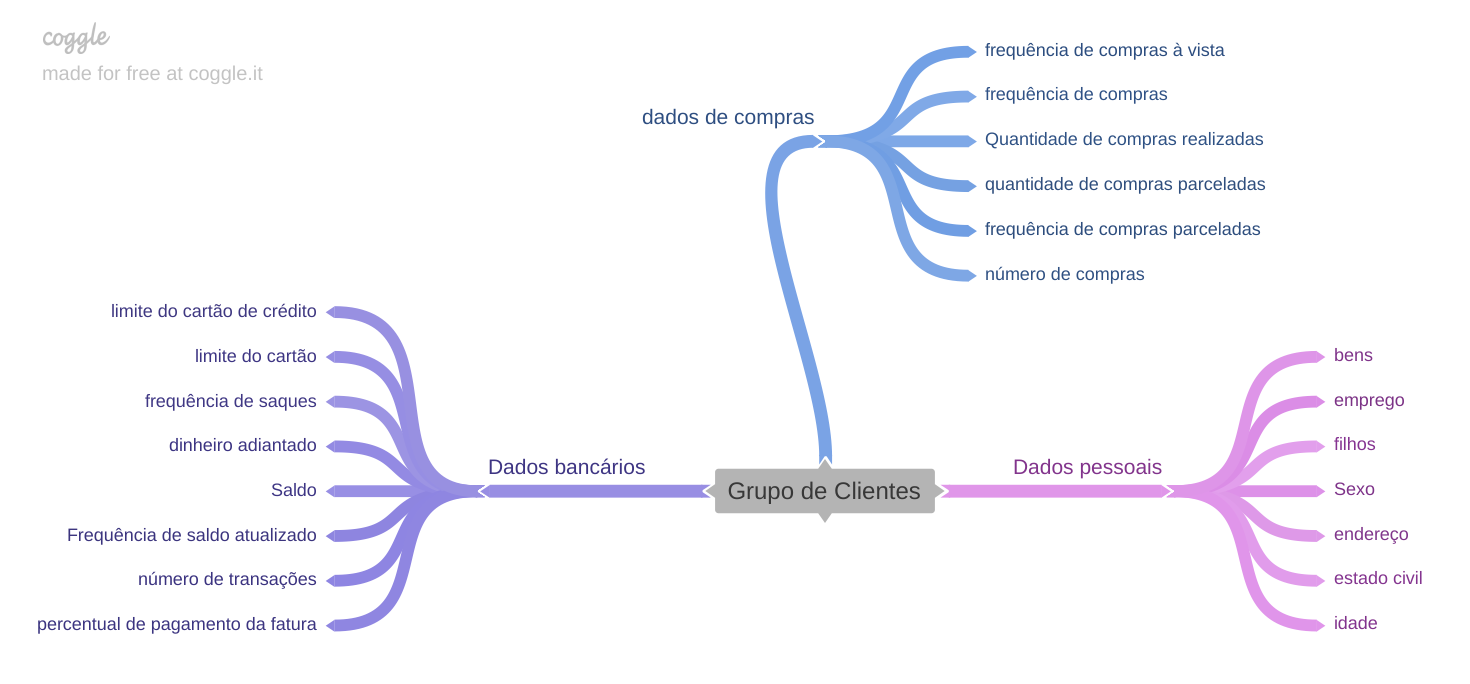

In [12]:
#mostrando a imagem do mapa mental de hipoteses
Image('img/Grupo_de_Clientes.png')

## 2.2.Criação das Hipoteses

**1.** Clientes com o Saldo maior deveriam ter um número de compras realizadas maior.

**2.** Clientes com o Saldo menor deveriam ter um número de compras parceladas maior.

**3.** Clientes com um limite do cartão de crédito maior deveriam ter uma frequencia de compras à vista maior.

**4.** Clientes com o limiete do cartão de crédito maior deveriam ter o percentual de pagamento da fatura maior.

**5.** Clientes mais antigos deveriam ter um limite do cartão maior.

**6.** Clientes com o saldo menor deveiam ter uma frequência de saques de dinheiro adiantado maior.

**7.** Clientes com um limite maior deveriam ter um percentual de compras à vista maior.

**8.** Clientes com um saldo maior deveriam ter uma quantidade de compras de uma só vez maior.

# 3.0. VARIABLE FILTERING

In [13]:
df3 = df2.copy()

## 3.1. Seleção das colunas

In [14]:
#dropando a coluna cust_id que não é necessária
df3 = df3.drop('cust_id', axis = 1)

# 4.0. EXPLORATORY DATA ANALYSIS

In [15]:
df4 = df3.copy()

## 4.1. Análise Univariada

### 4.1.1. Numerical Variable

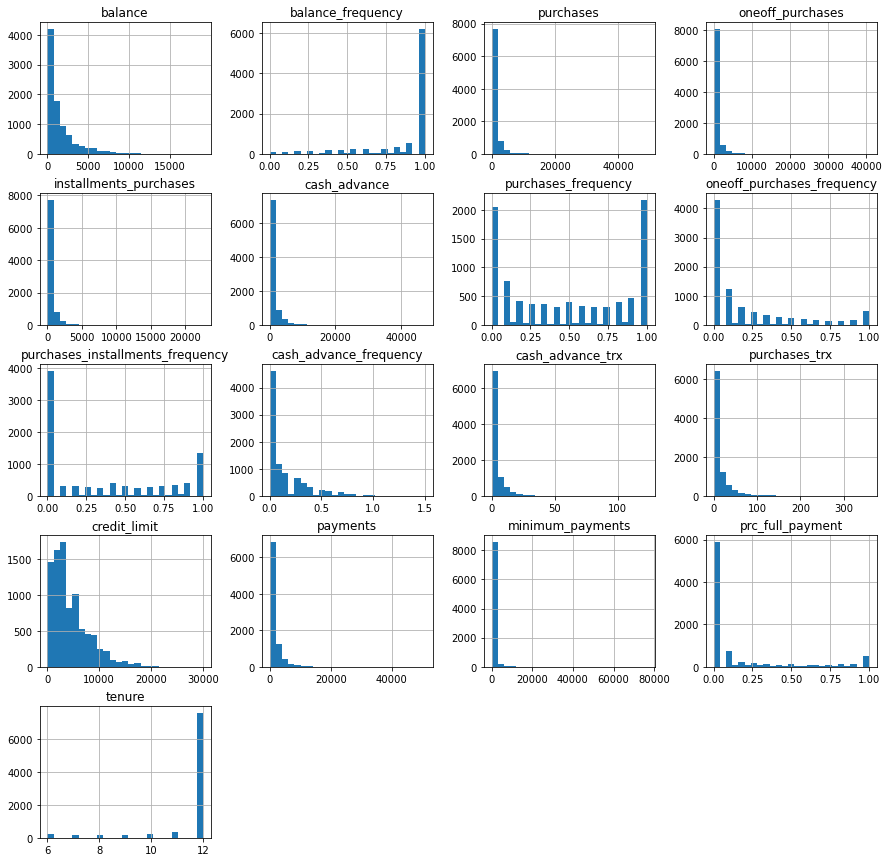

In [16]:
pylab.rcParams['figure.figsize'] = (15.0, 15.0)
num_attributes.hist(bins = 25);

## 4.2. Análise Bivariada

### H1. Clientes com o Saldo maior deveriam ter um número de compras realizadas maior.



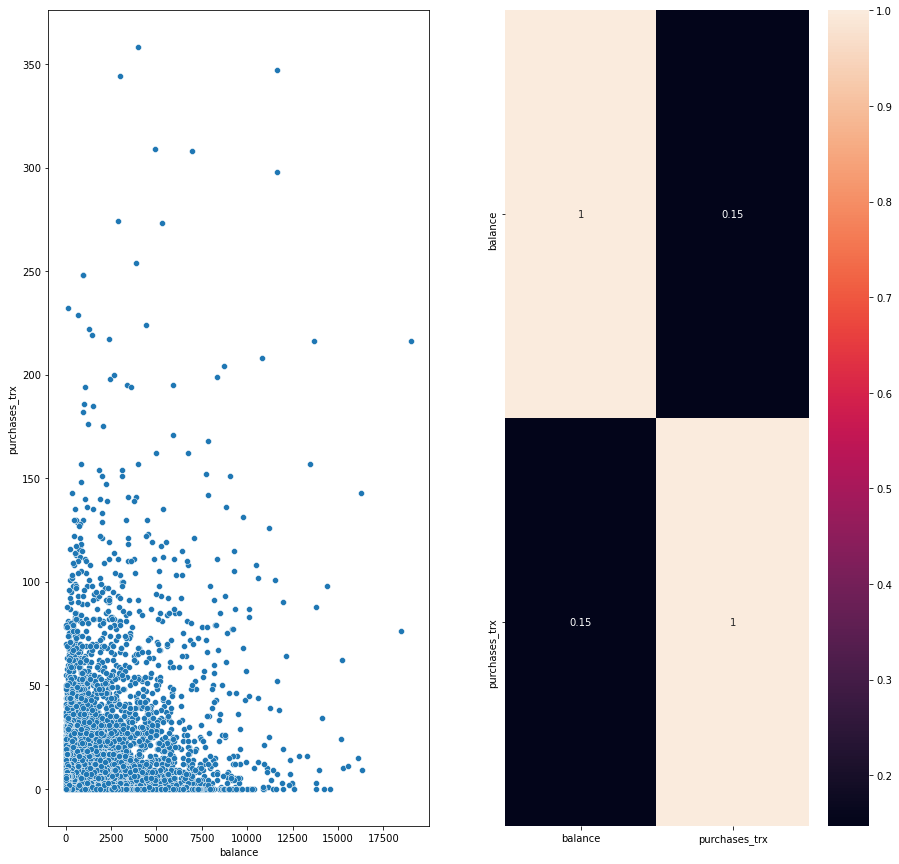

In [17]:
plt.subplot( 1, 2, 1)
sns.scatterplot( x= 'balance', y= 'purchases_trx', data=df4 );

plt.subplot( 1, 2, 2 )
aux1 = df4[['balance', 'purchases_trx']].groupby( 'balance' ).sum().reset_index()
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### H2. Clientes com o Saldo menor deveriam ter um número de compras parceladas maior.



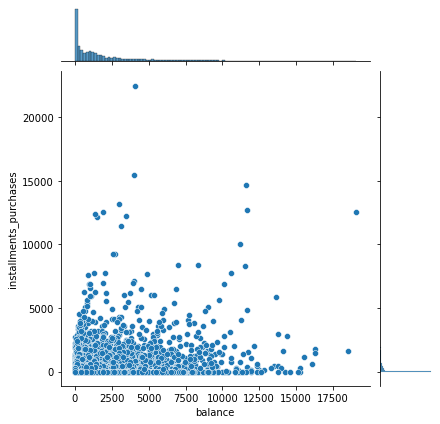

In [18]:
sns.jointplot(x='balance', y='installments_purchases',  data=df4)


### H3. Clientes com um limite do cartão de crédito maior deveriam ter uma frequencia de compras à vista maior.

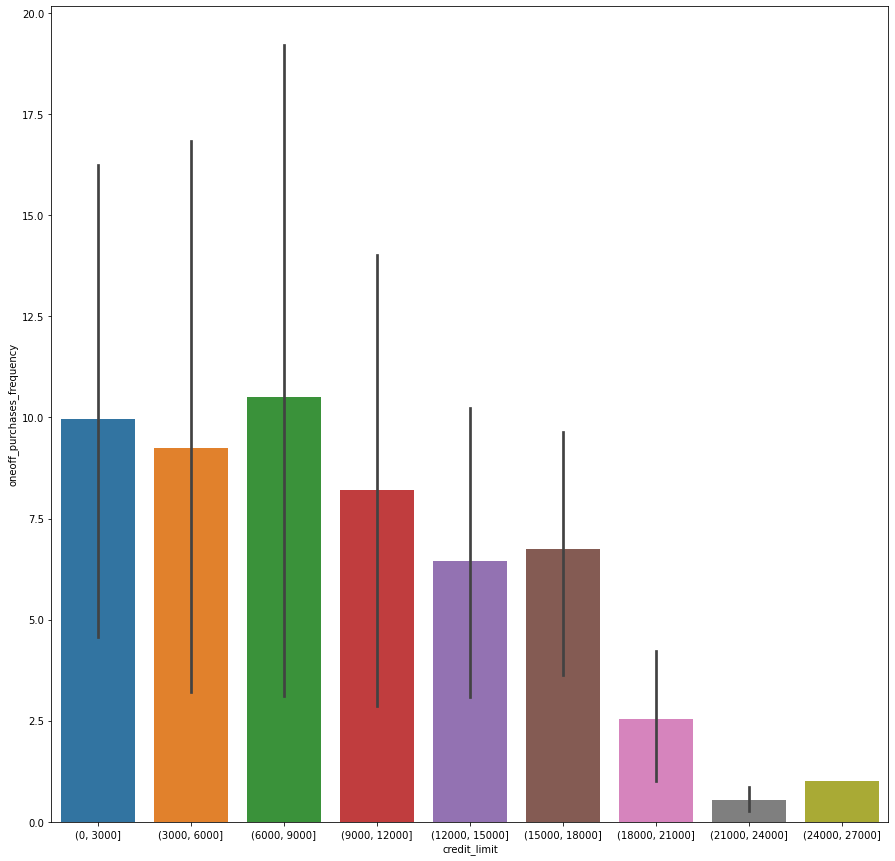

In [19]:
aux1 = df4[['credit_limit', 'oneoff_purchases_frequency']].groupby( 'credit_limit' ).sum().reset_index()
bins = list( np.arange( 0, 30000, 3000) )
aux1['credit_limit'] = pd.cut( aux1['credit_limit'], bins=bins )
sns.barplot( x='credit_limit', y='oneoff_purchases_frequency', data=aux1 );


### H4. Clientes com o limiete do cartão de crédito maior deveriam ter o percentual de pagamento da fatura maior.


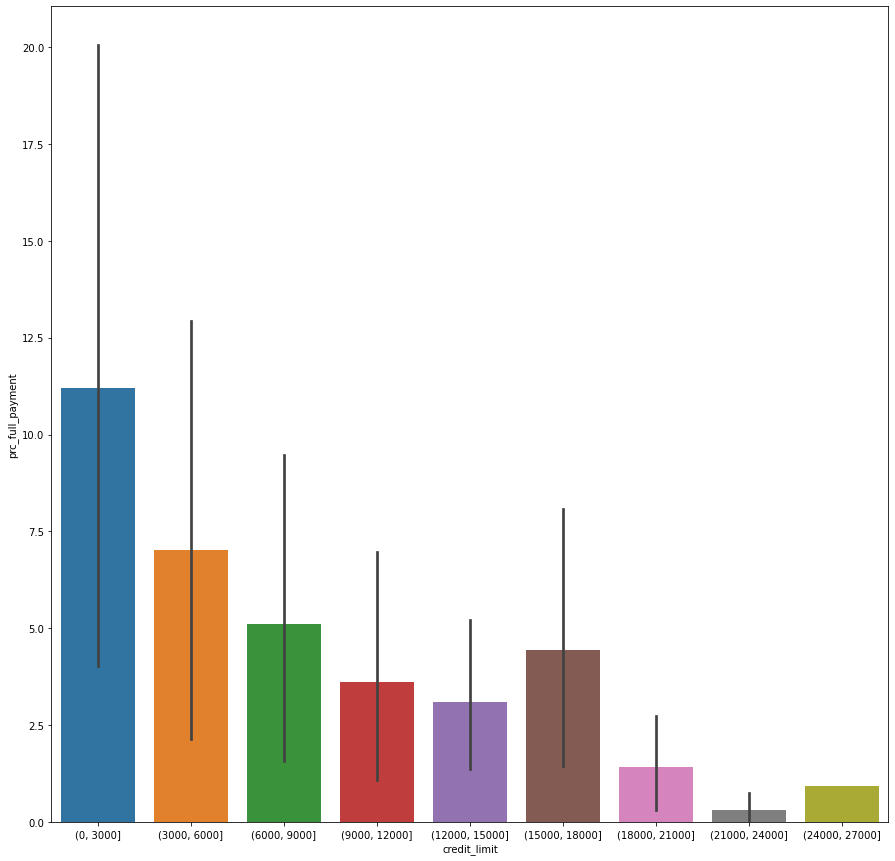

In [20]:
aux1 = df4[['credit_limit', 'prc_full_payment']].groupby( 'credit_limit' ).sum().reset_index()
bins = list( np.arange( 0, 30000, 3000) )
aux1['credit_limit'] = pd.cut( aux1['credit_limit'], bins=bins )
sns.barplot( x='credit_limit', y='prc_full_payment', data=aux1 );


### H5. Clientes mais antigos deveriam ter um limite do cartão maior.


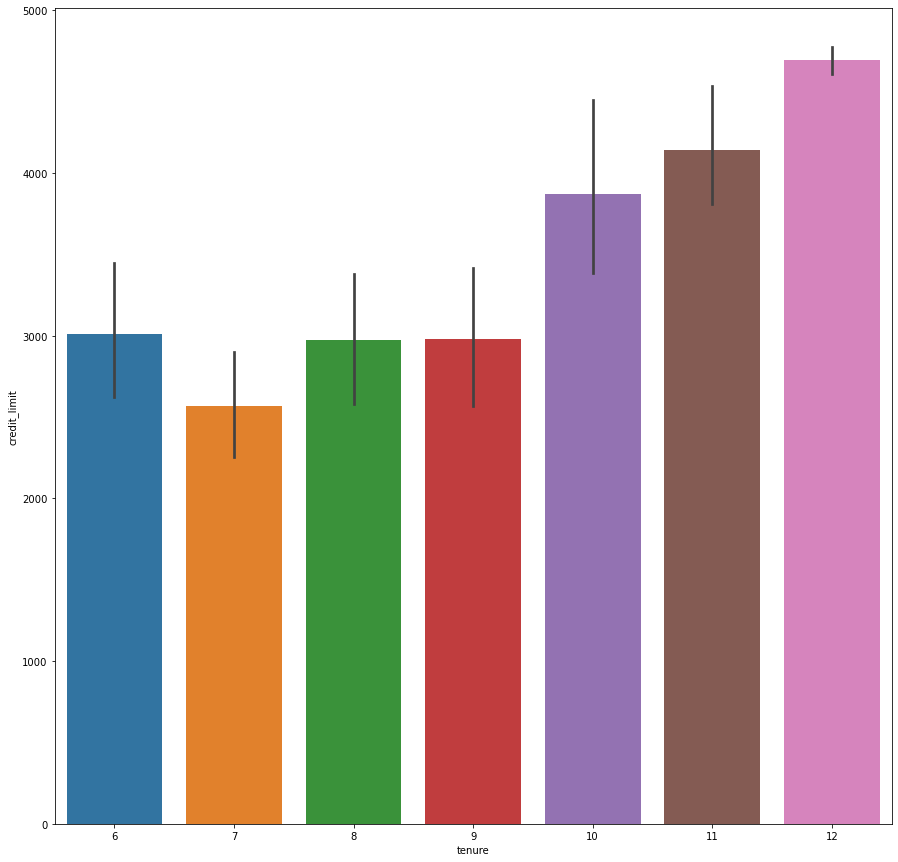

In [21]:
sns.barplot( x='tenure', y='credit_limit', data=df4 );

### H6. Clientes com o saldo menor deveiam ter uma frequência de saques de dinheiro adiantado maior.


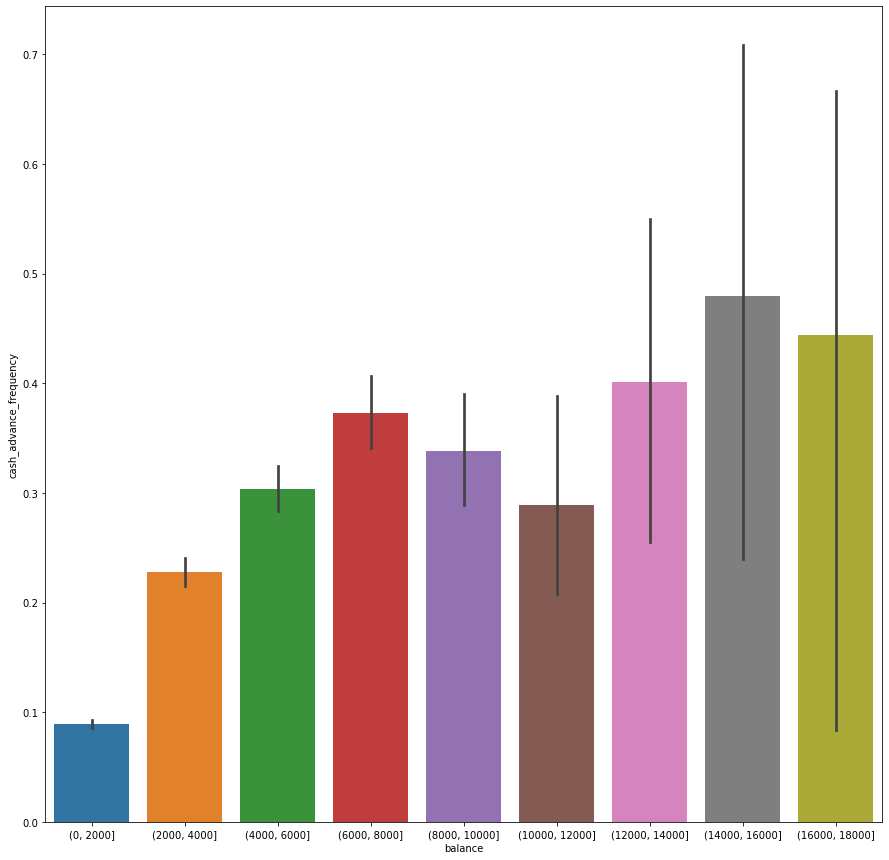

In [22]:
aux1 = df4[['balance', 'cash_advance_frequency']].groupby( 'balance' ).sum().reset_index()
bins = list( np.arange(0, 19043, 2000 ) )
aux1['balance'] = pd.cut(aux1['balance'], bins=bins)
sns.barplot( x='balance', y='cash_advance_frequency', data=aux1 );


### H7. Clientes com um limite maior deveriam ter um percentual de compras à vista maior.


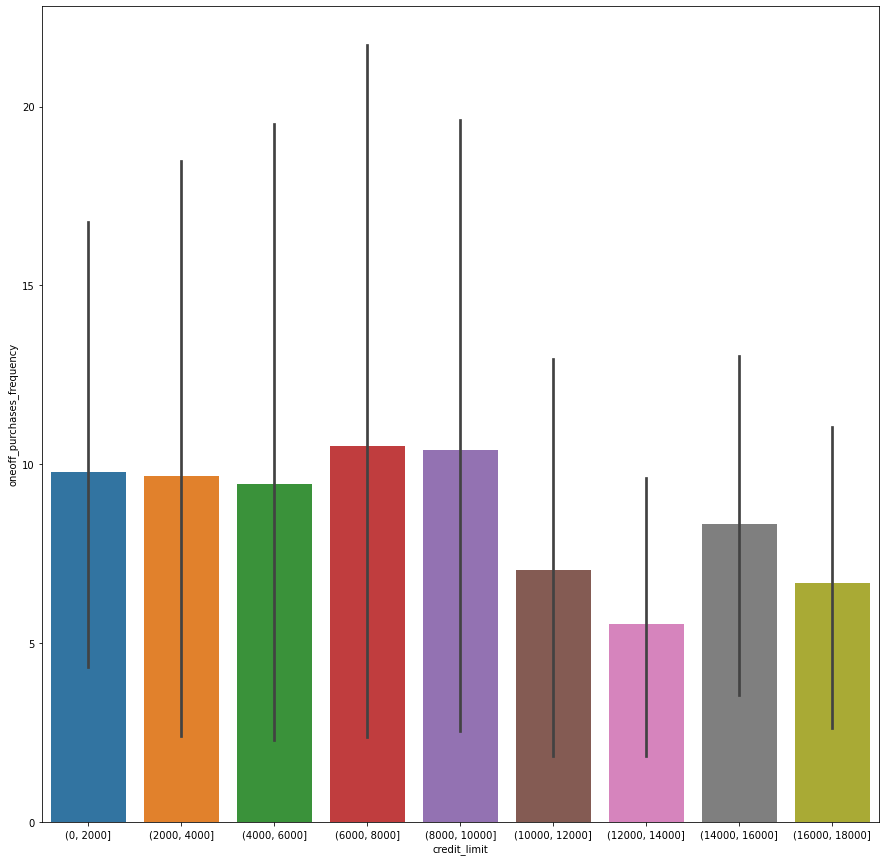

In [23]:
aux1 = df4[['credit_limit', 'oneoff_purchases_frequency']].groupby( 'credit_limit' ).sum().reset_index()
bins = list( np.arange(0, 19043, 2000 ) )
aux1['credit_limit'] = pd.cut(aux1['credit_limit'], bins=bins)
sns.barplot( x='credit_limit', y='oneoff_purchases_frequency', data=aux1 );

### H8. Clientes com limite de crédito mais baixo deveriam pegar mais dinheiro adiantado.

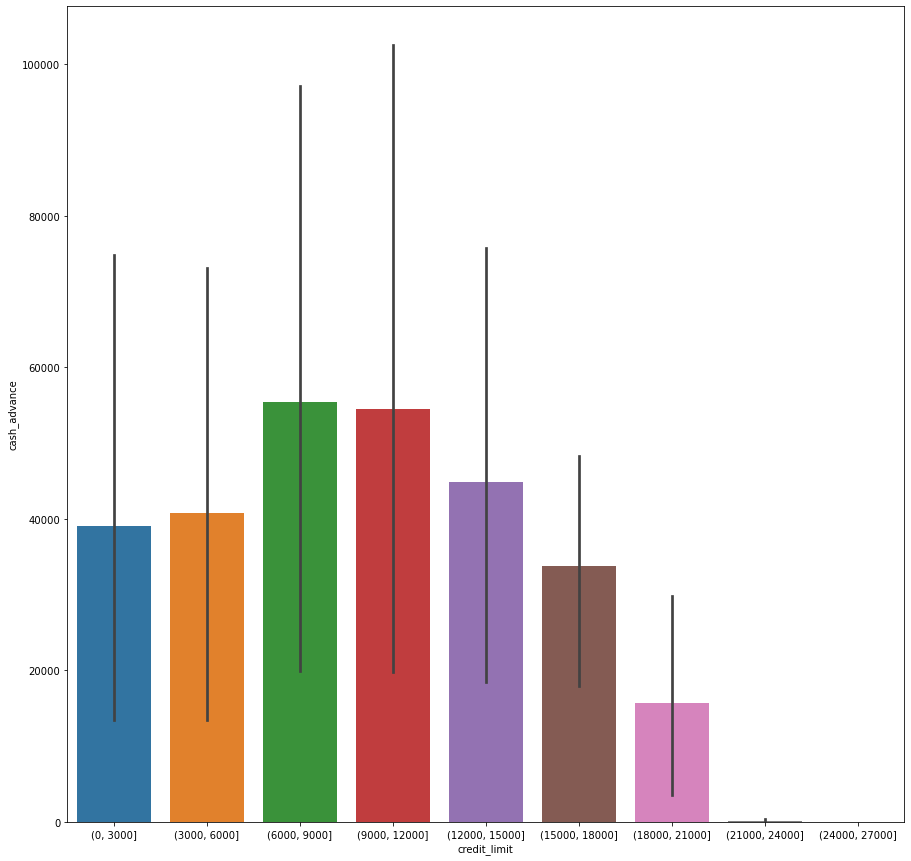

In [24]:
aux1 = df4[['credit_limit', 'cash_advance']].groupby( 'credit_limit' ).sum().reset_index()
bins = list( np.arange(0, 30000, 3000 ) )
aux1['credit_limit'] = pd.cut(aux1['credit_limit'], bins=bins)
sns.barplot( x='credit_limit', y='cash_advance', data=aux1 );

## 4.3. Análise Multivariada

## 4.3.1. Numerical Attributes

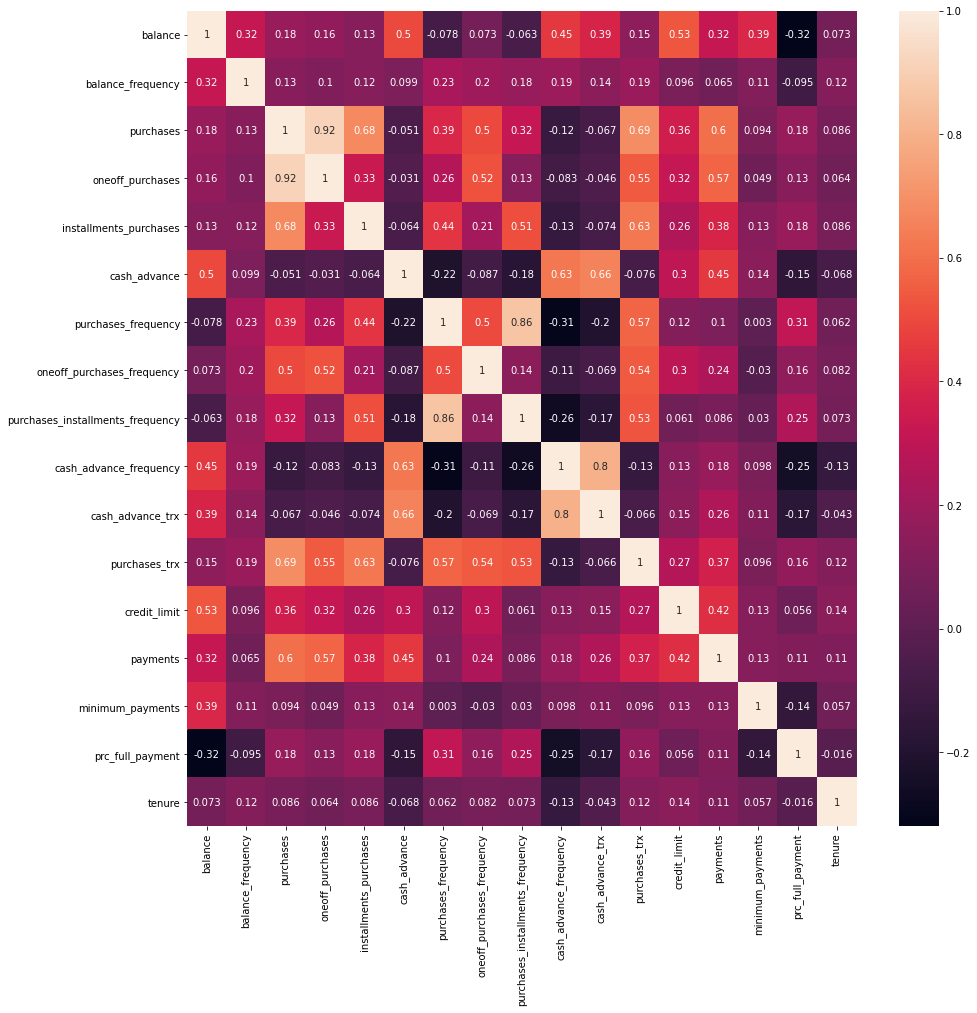

In [25]:
#criando matriz de correlação
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

# 5.0. DATA PREPARATION

In [26]:
df5 = df4.copy()

## 5.1. Rescaling

In [27]:
#Rescalando os dados utlizando o Standad Scaler 
sc = StandardScaler()
df5 = sc.fit_transform( df5 )

In [28]:
df5

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096745,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931031,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166308,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546539,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690638,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294632,
        -0.52555097, -4.12276757]])

# 6.0. MACHINE LEARNING MODELLING 

In [29]:
df6 = df5.copy()

## 6.1. K-Means

### 6.1.1. Obtenção do número de cluster(elbow)

In [30]:
#criandos os clusters
wcss_1 = []
range_values = range( 1, 20 )
for i in range_values:
    kmeans = KMeans( n_clusters = i )
    kmeans.fit( df6 )
    wcss_1.append( kmeans.inertia_)

Text(0, 0.5, 'WCSS')

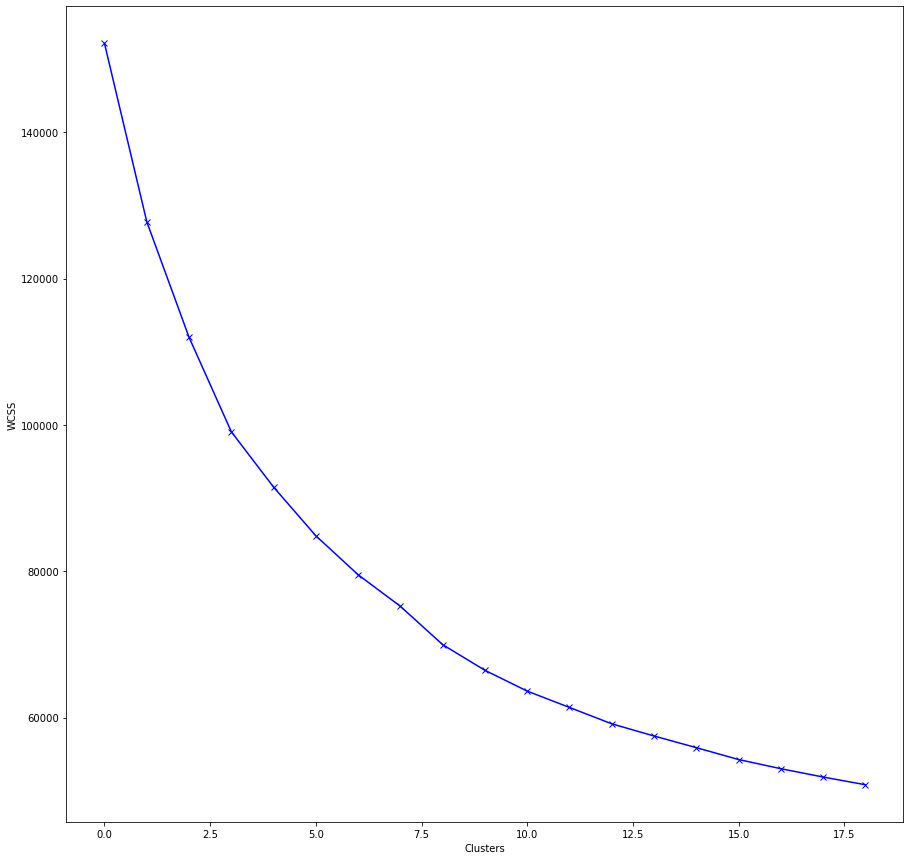

In [31]:
#analisando o resultado
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

### 6.1.2. Treinando o modelo e visualizando os resultados. 

In [32]:
#treinando o modelo com o numero de clusters que encontramos no passo anterior
kmeans = KMeans(n_clusters=8)
kmeans.fit(df6)
labels = kmeans.labels_

In [33]:
#verificando o resultado e transformando em dataset
cluster_centers = pd.DataFrame( data= kmeans.cluster_centers_, columns = [df4.columns])
cluster_centers

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,0.006414,0.403526,-0.354048,-0.238404,-0.399043,-0.106960,-0.840417,-0.381812,-0.751338,0.083828,-0.042039,-0.477343,-0.308344,-0.254090,-0.008294,-0.455419,0.274011
1,-0.117838,0.402699,0.580381,0.704055,0.078632,-0.332406,0.998841,1.914808,0.214442,-0.420466,-0.335135,0.665817,0.470247,0.173078,-0.155316,0.463367,0.274996
2,-0.360629,0.332096,-0.029910,-0.240701,0.371292,-0.361564,0.996538,-0.381629,1.207927,-0.472031,-0.359365,0.193873,-0.260312,-0.213083,-0.042574,0.315645,0.256051
3,1.110880,0.475588,2.577032,1.844508,2.704786,-0.124088,1.170103,1.558433,1.293808,-0.264161,-0.123664,3.233388,1.337224,1.519505,0.762382,0.239901,0.335466
4,-0.334730,-0.345333,-0.286419,-0.212137,-0.287137,0.067392,-0.201162,-0.281559,-0.225456,0.309205,0.000523,-0.385819,-0.563833,-0.391094,-0.209242,0.012748,-3.195281
5,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
6,1.649520,0.394632,-0.223588,-0.159238,-0.236189,1.984537,-0.487353,-0.214517,-0.427217,1.915128,1.909155,-0.273996,1.001823,0.788378,0.497359,-0.395090,0.073986
7,-0.700774,-2.142458,-0.309826,-0.234356,-0.301910,-0.320004,-0.554195,-0.441318,-0.439313,-0.520884,-0.376232,-0.418560,-0.173839,-0.191605,-0.256401,0.285792,0.200241


In [35]:
# rescalando os dados para analisa-los( conseguimos ver com qual cluster cada cliente se encaixa )
cluster_centers = sc.inverse_transform( cluster_centers )
cluster_centers = pd.DataFrame( data = cluster_centers, columns =[df4.columns] )
cluster_centers

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,1577.826006,0.972862,246.774969,196.736194,50.218144,754.571110,0.153051,0.088556,0.065836,0.151919,2.961943,2.844871,3372.568563,997.577270,844.876890,0.020512,11.884016
1,1319.204852,0.972666,2243.198231,1761.024293,482.173938,281.800513,0.891234,0.773682,0.449662,0.051005,0.961778,31.259556,6205.402020,2234.188697,502.248816,0.289241,11.885333
2,813.856304,0.955941,939.301187,192.922627,746.822095,220.654278,0.890310,0.088610,0.844498,0.040686,0.796425,19.528798,3547.328799,1116.289016,764.989249,0.246035,11.859980
3,3876.677435,0.989933,6509.074325,3653.942331,2856.972485,718.653248,0.959969,0.667368,0.878630,0.082283,2.404908,95.079755,9359.815951,6131.960741,2640.906358,0.223882,11.966258
4,867.763259,0.795464,391.267188,240.333195,151.413227,1120.194771,0.409614,0.118463,0.274835,0.197019,3.252396,5.119808,2442.994313,600.965625,376.575541,0.157443,7.241214
5,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
6,4997.811385,0.970755,525.505034,328.134239,197.484519,5140.537482,0.294752,0.138463,0.194650,0.518381,16.277405,7.899329,8139.490543,4015.422105,2023.280189,0.038157,11.616331
7,105.872392,0.369742,341.256762,203.453753,138.053897,307.806878,0.267925,0.070804,0.189843,0.030910,0.681319,4.306002,3861.952193,1178.466249,266.675512,0.237304,11.785292


In [36]:
#Aqui colocamos cluster devidamente em cada cliente.
creditcard_df_cluster = pd.concat( [df4, pd.DataFrame({'cluster': labels} )], axis = 1 )
creditcard_df_cluster

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.200000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.200000,0.000000,6,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,4


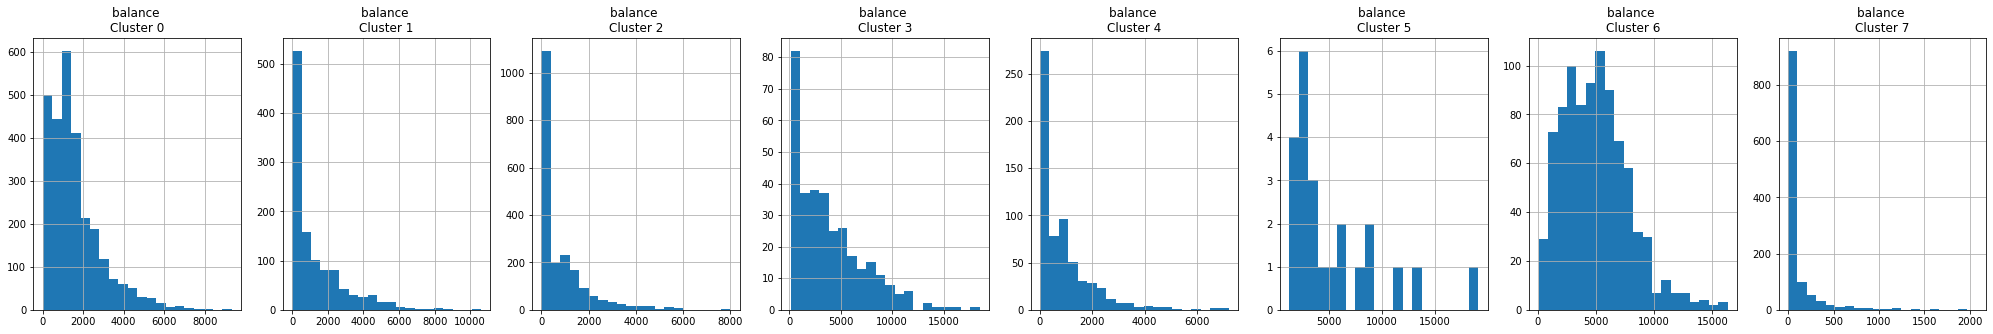

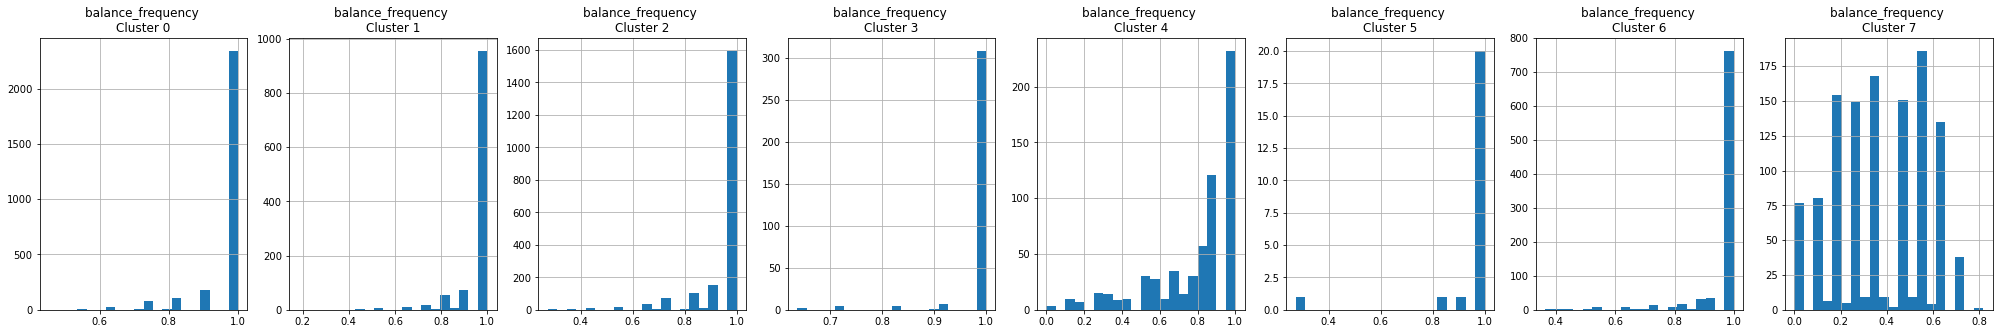

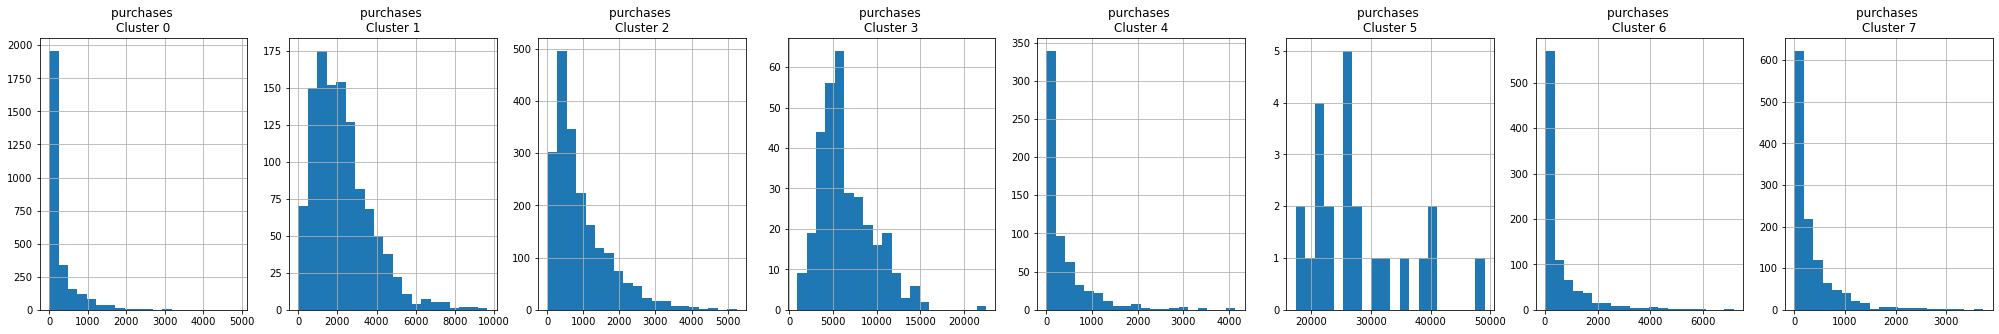

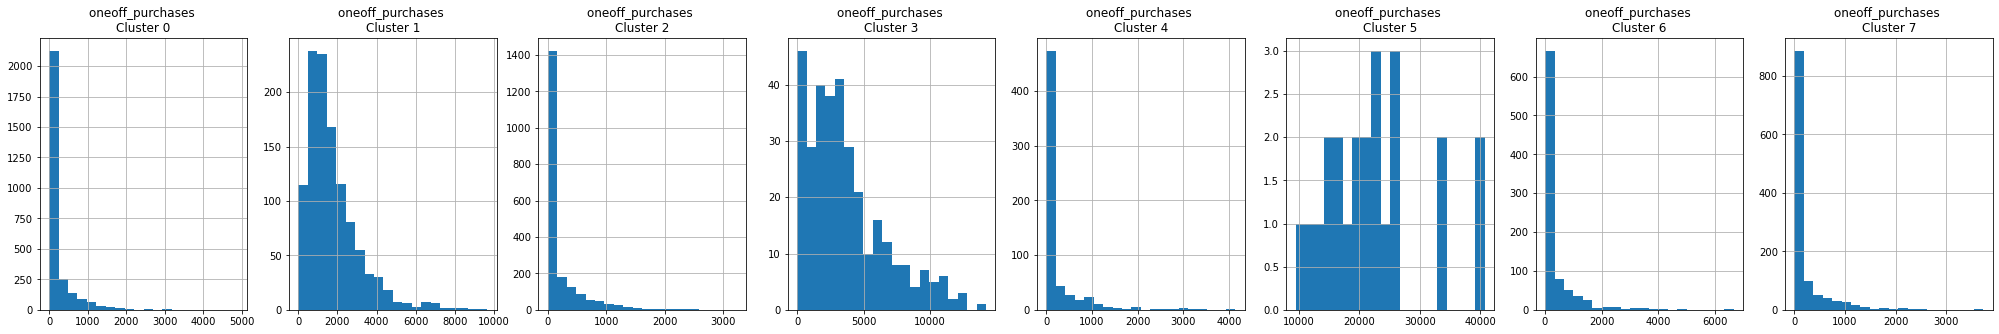

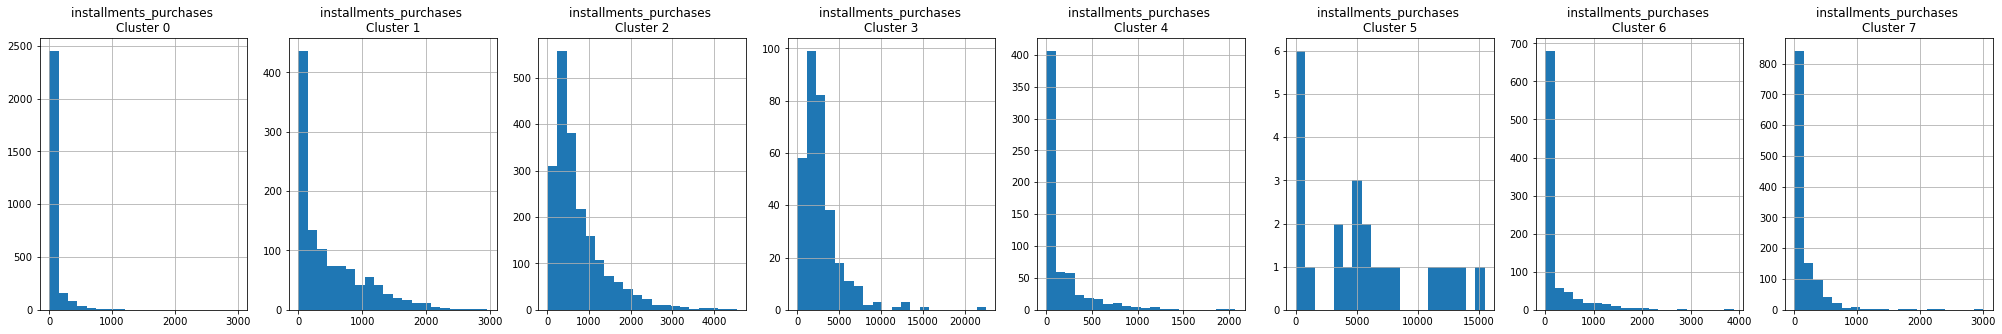

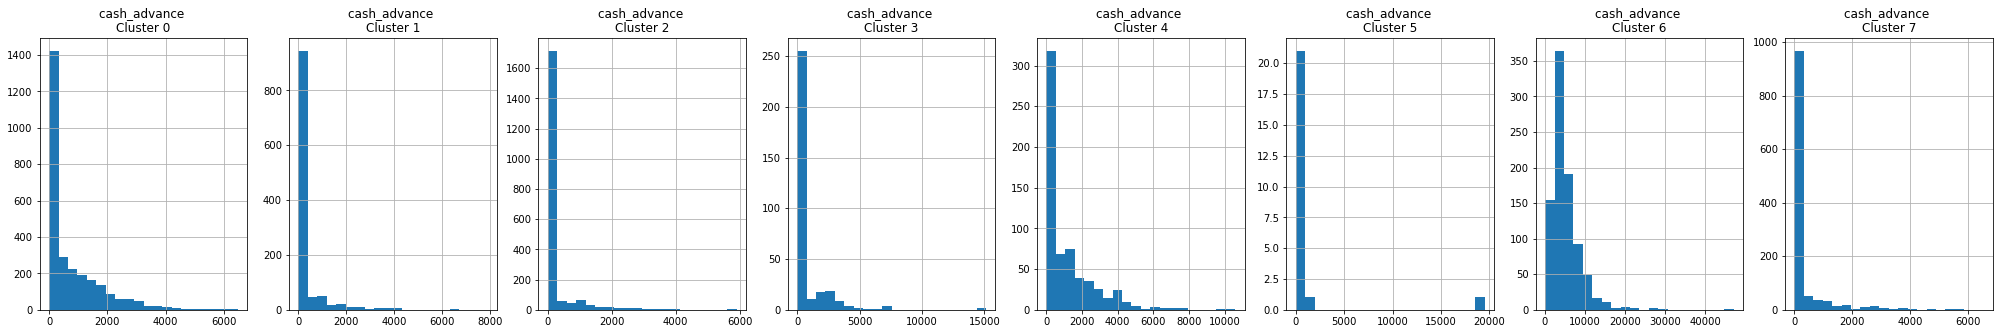

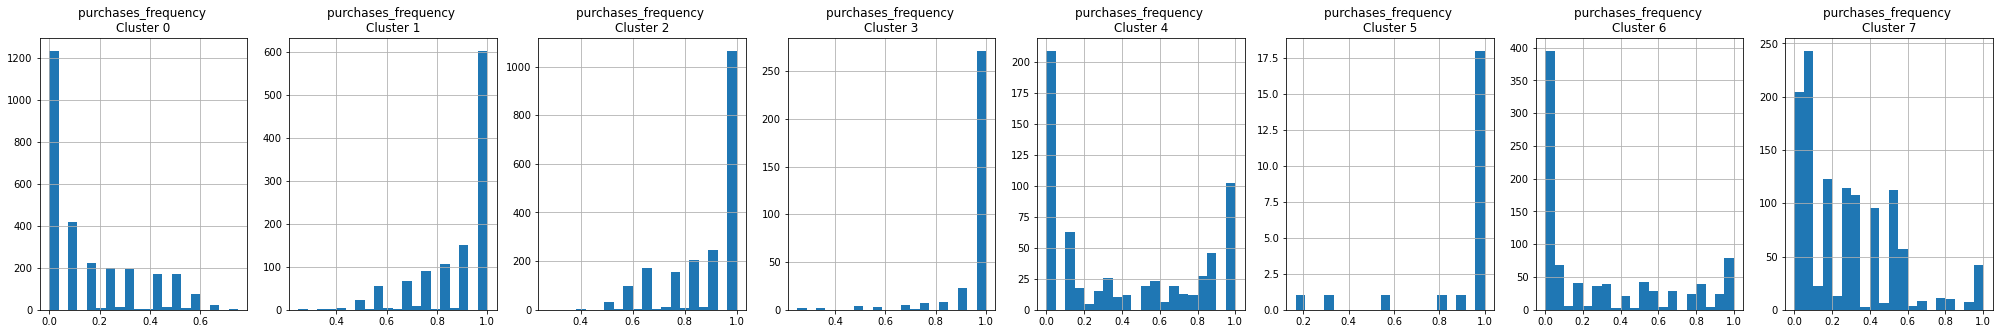

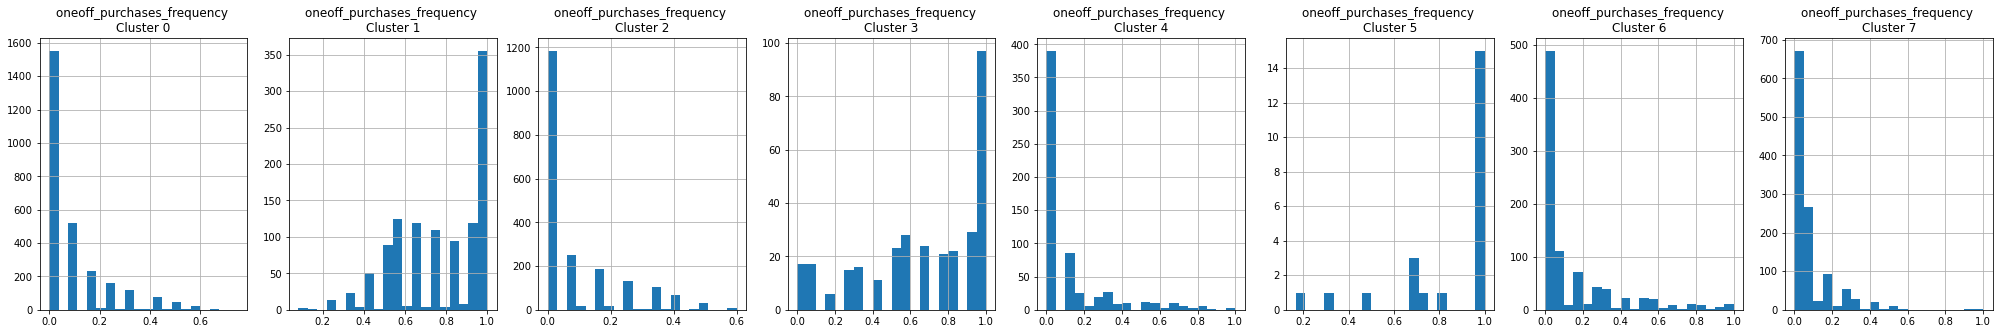

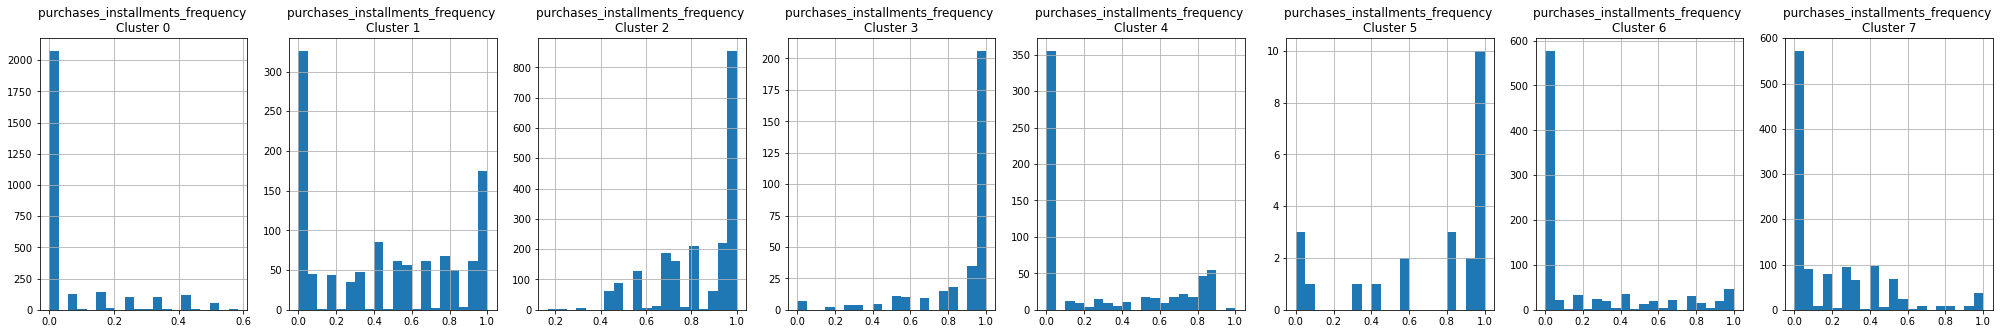

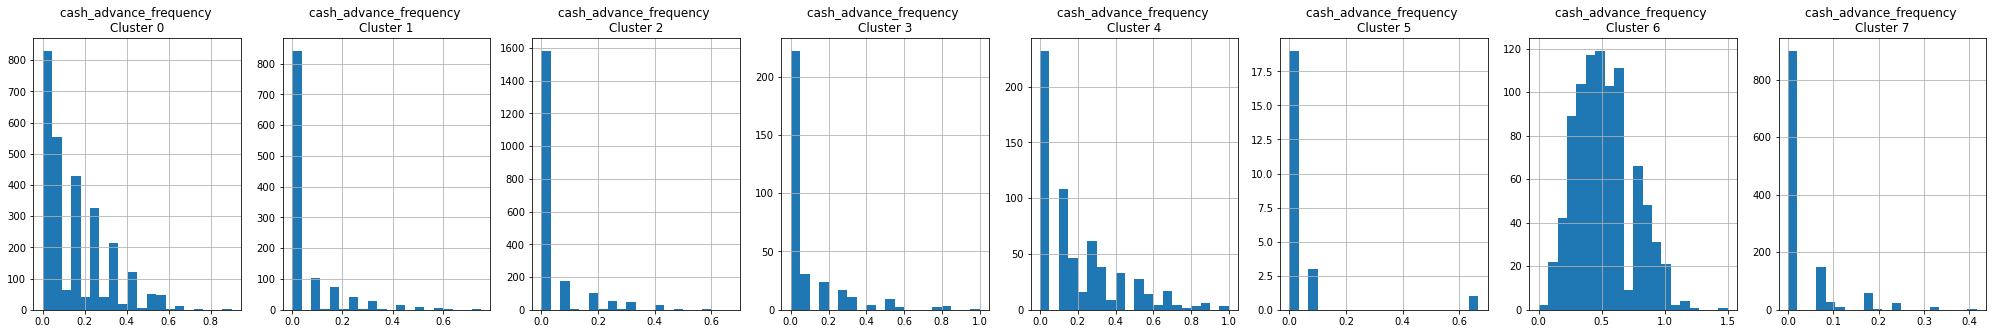

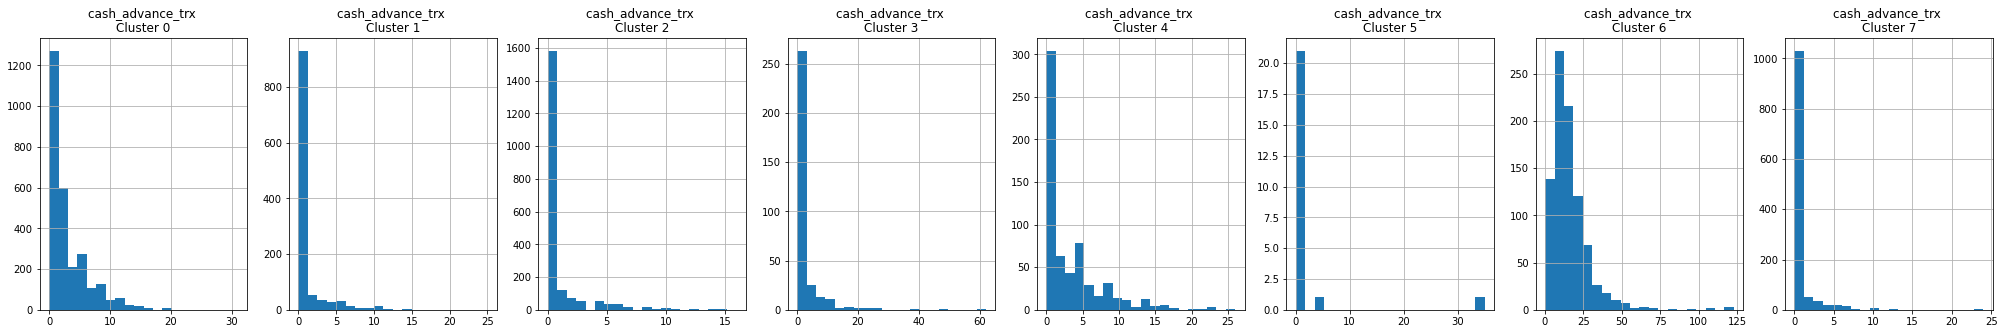

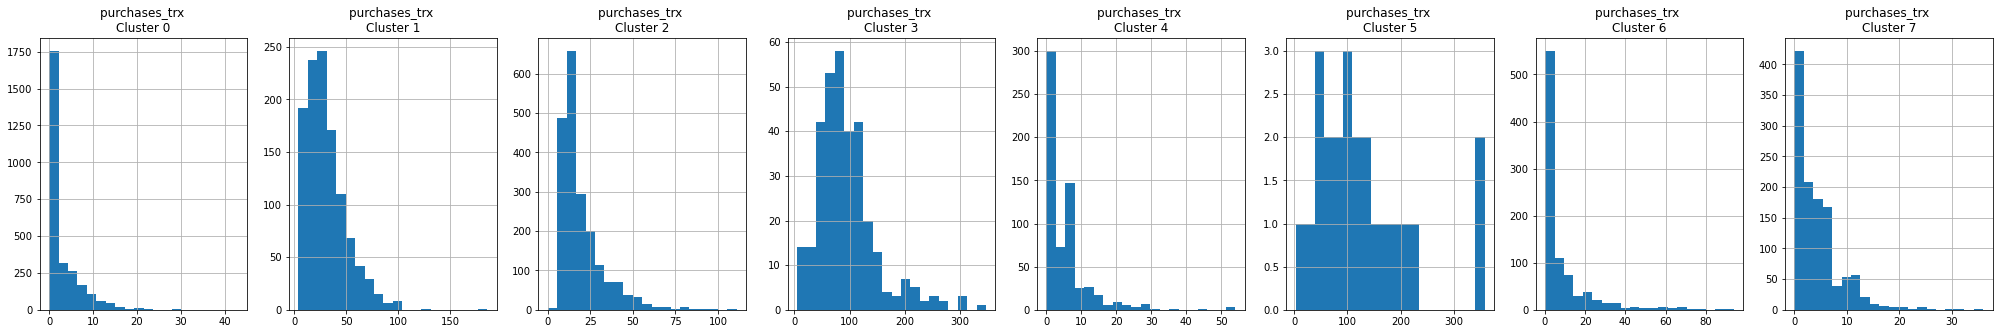

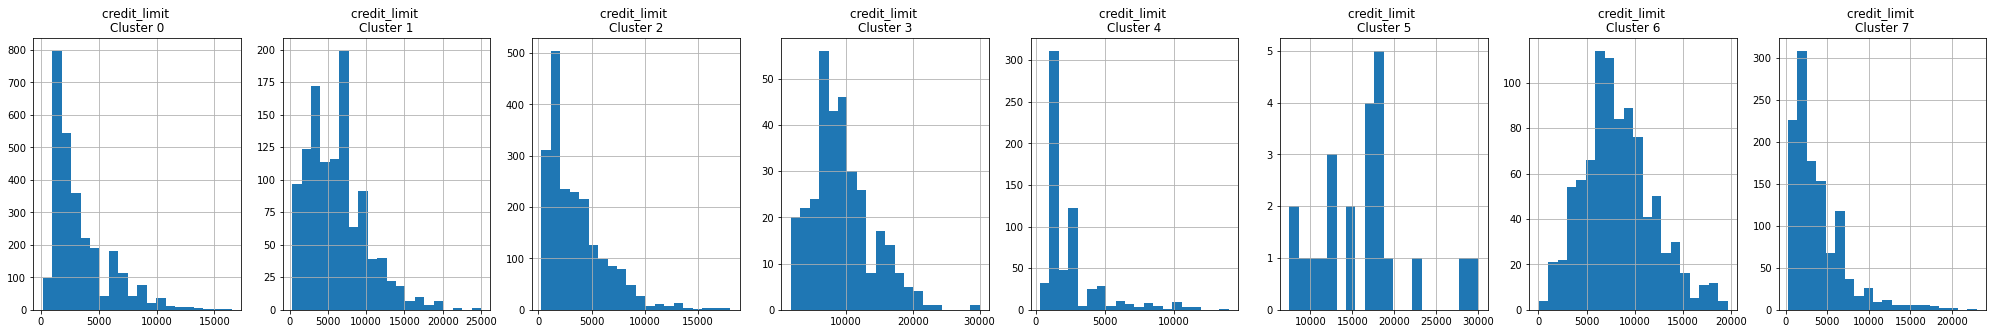

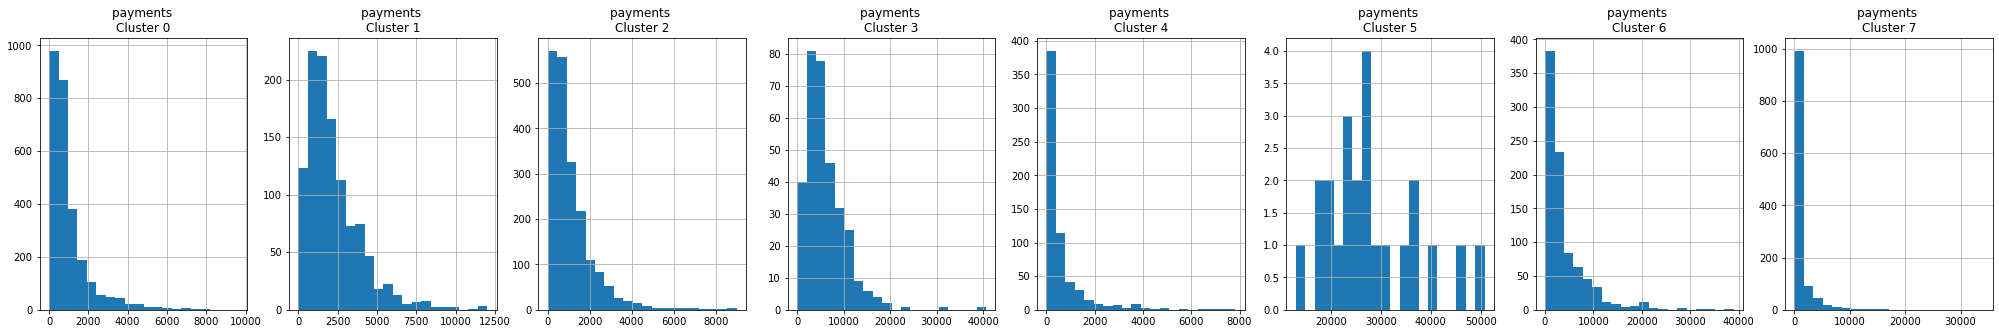

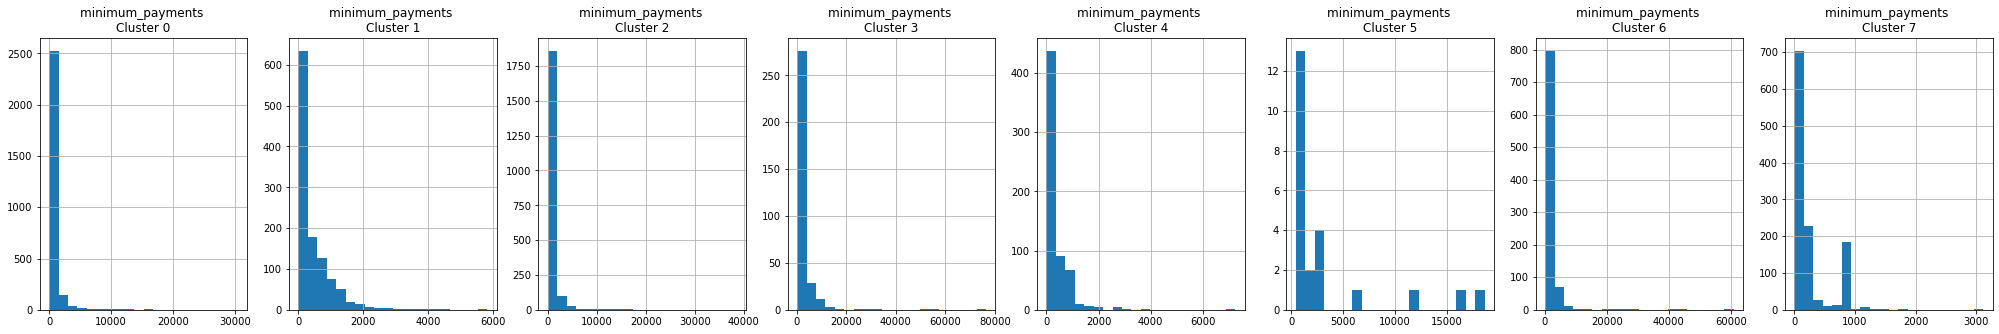

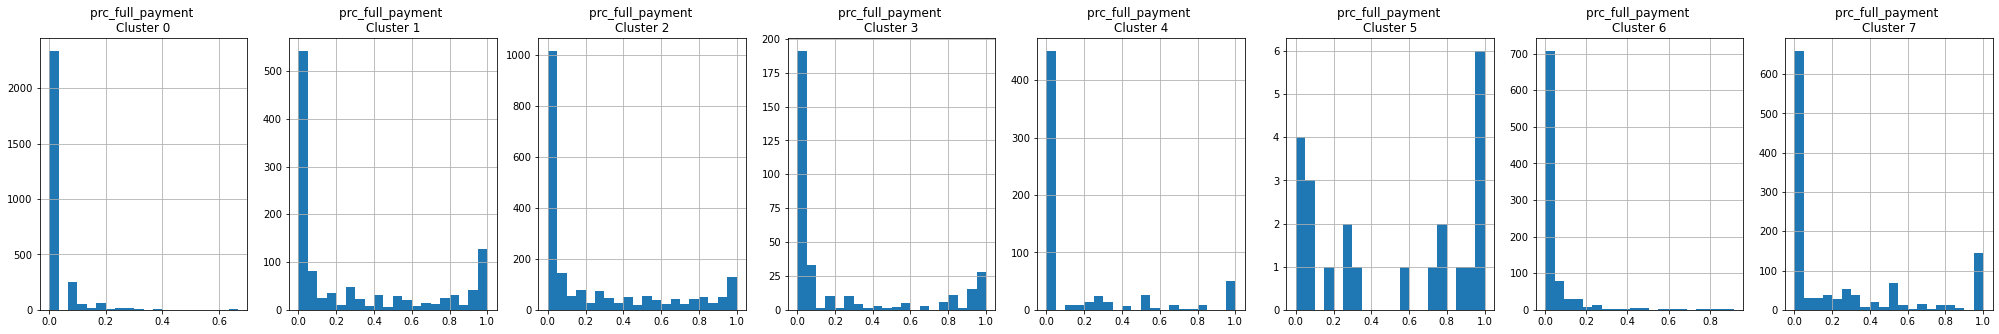

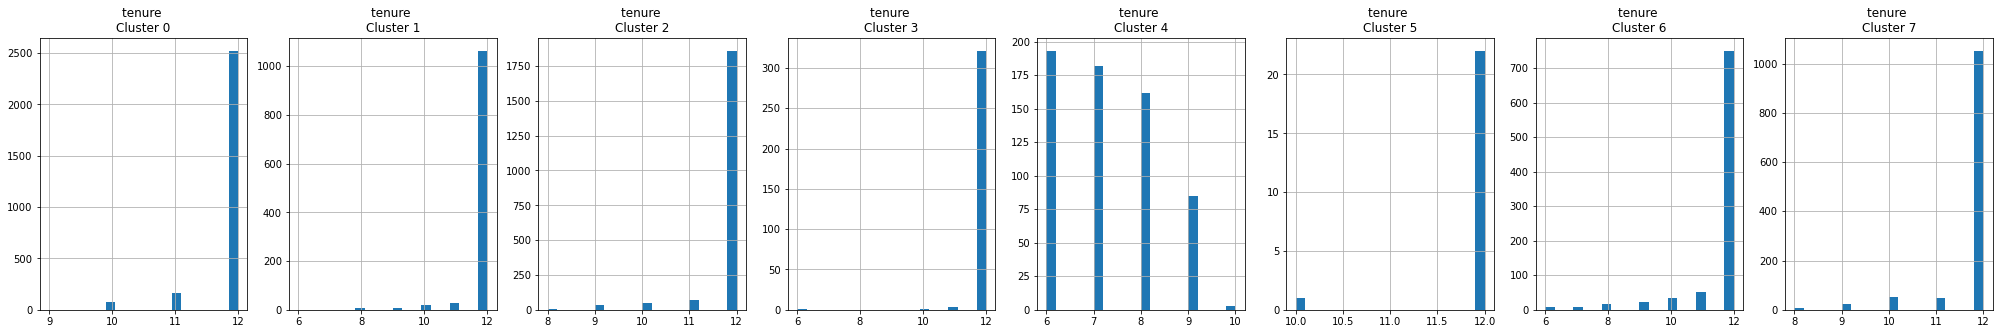

In [37]:
#plotmaos todas as features e todos os grupos de clusters para analisa-los
for i in df4.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [38]:
#ordenamos do menor cluster (0) para o maior (7) para facilitar a visualização.
credit_ordered = creditcard_df_cluster.sort_values( by = 'cluster' )
credit_ordered.head()


#e caso eu queira salvar o arquivo em csv para o time de marketing analisar 
#credit_ordered.to_csv('cluster.csv')

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
4238,1116.944017,1.000000,182.64,182.64,0.0,109.600359,0.333333,0.333333,0.000000,0.083333,1,4,1500.0,304.822958,347.685591,0.0,12,0
4242,1868.523786,1.000000,27.89,27.89,0.0,47.998873,0.083333,0.083333,0.000000,0.083333,1,2,2000.0,440.707307,517.115912,0.0,12,0
4243,1000.235038,1.000000,79.41,79.41,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,6500.0,868.377193,264.329249,0.0,12,0
4253,1000.931473,1.000000,0.00,0.00,0.0,374.200459,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,304.037261,290.949378,0.0,12,0


## 6.2. PCA ( Principal Component Analysis )

In [39]:
#vamos diminuir as 18 caracteristicas para apenas 2 
pca = PCA( n_components=2 )
principal_comp = pca.fit_transform( df6 )
principal_comp

array([[-1.68222054, -1.07645197],
       [-1.13829666,  2.50645312],
       [ 0.9696862 , -0.38349621],
       ...,
       [-0.92620323, -1.81077687],
       [-2.33655069, -0.65794798],
       [-0.55642014, -0.40044316]])

In [40]:
pca_df = pd.DataFrame( data= principal_comp, columns=['pca1', 'pca2'] )
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076452
1,-1.138297,2.506453
2,0.969686,-0.383496
3,-0.873630,0.043136
4,-1.599433,-0.688572


In [41]:
pca_df = pd.concat([pca_df, pd.DataFrame( {'cluster': labels} )], axis = 1 )
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076452,0
1,-1.138297,2.506453,6
2,0.969686,-0.383496,1
3,-0.873630,0.043136,0
4,-1.599433,-0.688572,0


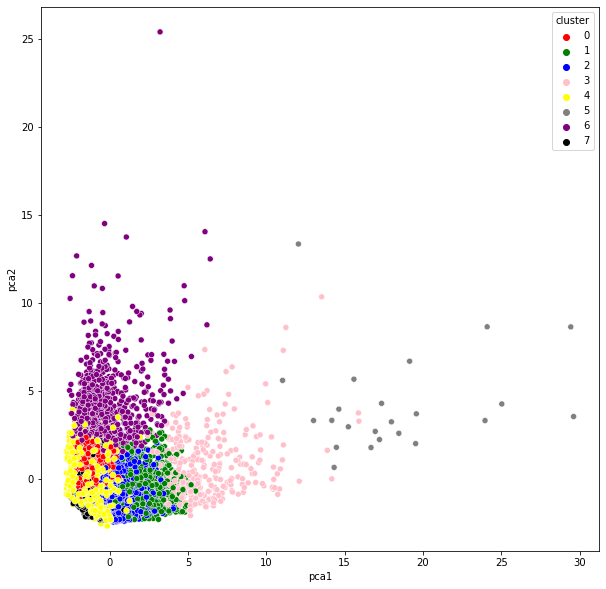

In [42]:
plt.figure( figsize=( 10, 10 ) )
sns.scatterplot( x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'] );

## 6.3. Autoencoders

In [46]:
# O autoenconder tera uma entra de 17 neuronios que estara ligada a uma camada de 500 neuronios que na sequencia estarão
#ligados a 2000 neuronios e por fim estarão ligadados com 10 neuronios e depois para "decodificar" passara pelo mesmo processo
#200 nueronios depois 500 e por final 17 (exemplificando 17 > 500 > 10 > 2000 > 500 > 17)
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [47]:
#Criandos as camadas com os neuronios 
input_df = Input( shape=( 17, ) )
x = Dense( 500, activation='relu' )( input_df )
x = Dense( 2000, activation='relu' )( x )

#camada de codificação
encoded = Dense( 10, activation='relu' )( x )

x = Dense( 2000, activation='relu' )( encoded )
x = Dense( 500, activation='relu' )( x )

#camada de decodificação
decoded = Dense( 17 )( x )

#autoencoder
autoencoder = Model( input_df, decoded )

#encoder
encoder = Model( input_df, encoded )


autoencoder.compile( optimizer = 'Adam', loss = 'mean_squared_error' )

In [52]:
autoencoder.fit( df6, df6, epochs = 50 )

Epoch 1/50
280/280 [==============================] - 4s 13ms/step - loss: 0.2011
Epoch 2/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0939
Epoch 3/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0887
Epoch 4/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0544
Epoch 5/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0543
Epoch 6/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0875
Epoch 7/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0495
Epoch 8/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0405
Epoch 9/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0570
Epoch 10/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0366
Epoch 11/50
280/280 [==============================] - 4s 14ms/step - loss: 0.0279
Epoch 12/50
280/280 [==============================] - 4s 13ms/step - loss: 0.0335: 0s - los - E

In [53]:
compact = encoder.predict( df6 )

In [57]:
#utilizando novamente o KMEANS depois do autoencoder
wcss_2 = []
range_values = range( 1, 20 )
for i in range_values:
    kmeans = KMeans( n_clusters = i )
    kmeans.fit( compact )
    wcss_2.append( kmeans.inertia_)

Text(0, 0.5, 'WCSS')

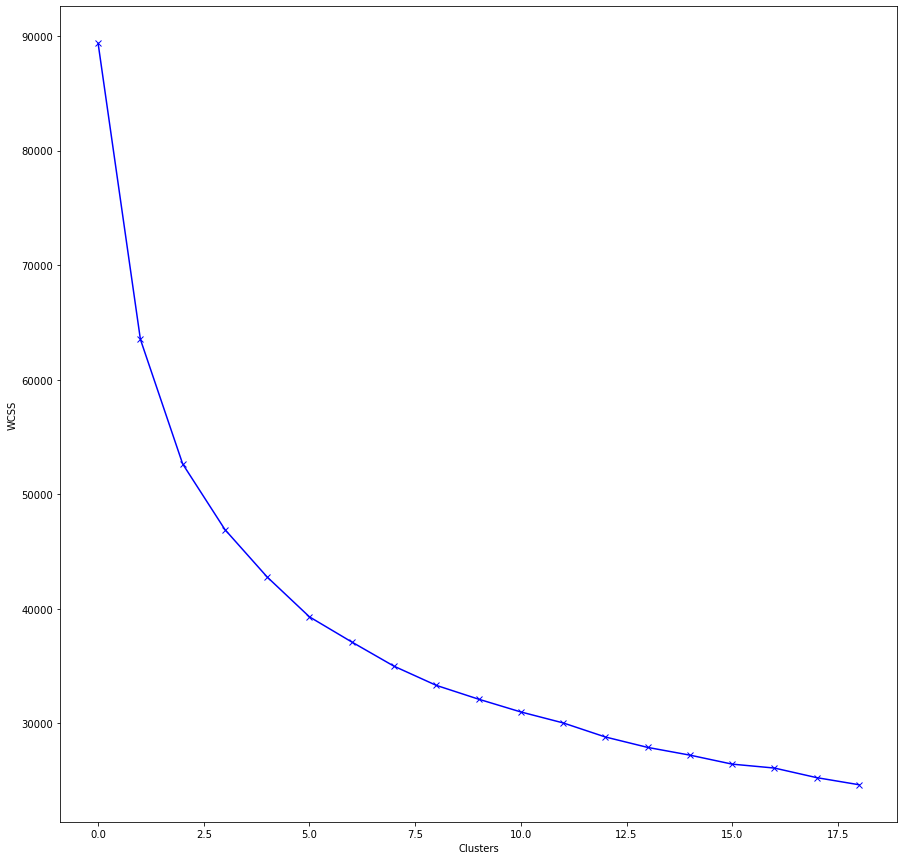

In [58]:
#plotando os graficos
plt.plot( wcss_2, 'bx-' )
plt.xlabel( 'Clusters' )
plt.ylabel( 'WCSS' )

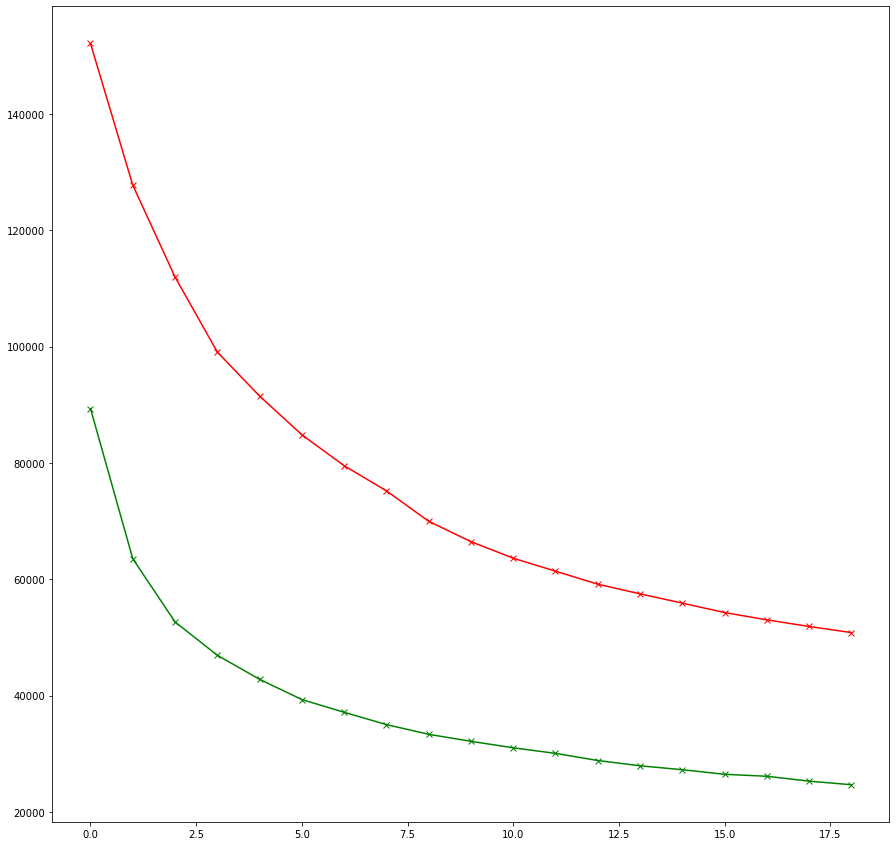

In [61]:
#comparando as duas abordagens
plt.plot( wcss_1, 'bx-', color = 'r' )
plt.plot( wcss_2, 'bx-', color = 'g' );

In [65]:
#treinando com o numero de clusters encotrado 
kmeans = KMeans( n_clusters=4 )
kmeans.fit( compact )

KMeans(n_clusters=4)

In [66]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 3, 0, ..., 3, 3, 3]), (8950,))

In [71]:
#mostrando os resultados
df_cluster_at = pd.concat( [df4, pd.DataFrame({'cluster': labels})], axis = 1 )
df_cluster_at

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.200000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.200000,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


In [72]:
#Aplicando o PCA só que com a base de dados que foi feito o autoencoder
pca = PCA( n_components = 2)
prin_comp = pca.fit_transform( compact )
pca_df = pd.DataFrame( data = prin_comp, columns = ['pca1', 'pca2'] )
pca_df.head()

,pca1,pca2
0,-1.886957,-0.092120
1,1.348707,1.647812
2,-0.476948,-0.560848
3,-0.877303,-0.085549
4,-1.923381,0.020273


In [73]:
#concatenando os dados
pca_df = pd.concat( [pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

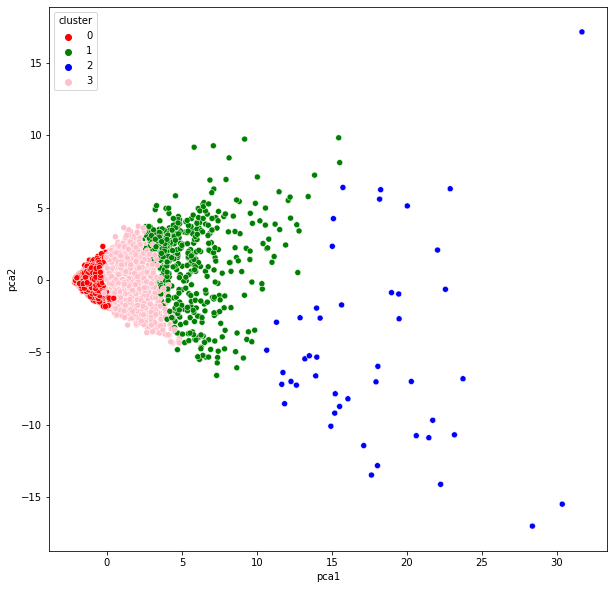

In [75]:
#plotando o resultado
plt.figure( figsize=( 10, 10 ) )
sns.scatterplot( x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'] );

In [76]:
#ordenando os dados
df_cluster_ordered = df_cluster_at.sort_values( by = 'cluster')

#aqui podemos criar um arquivo para enviar para equipe de marketing
#df_cluster_ordered.to_excel( 'cluster_ordered.xls')

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
7593,954.617658,1.000000,0.00,0.00,0.00,808.545456,0.000000,0.000000,0.000000,0.333333,4,0,2000.0,228.635319,398.358635,0.000000,12,0
7594,44.935526,1.000000,401.06,0.00,401.06,0.000000,0.916667,0.000000,0.916667,0.000000,0,11,1000.0,441.438423,181.013795,0.400000,12,0
4556,313.133110,1.000000,49.09,49.09,0.00,1306.110387,0.166667,0.166667,0.000000,0.416667,13,2,6500.0,1405.747523,189.159601,0.166667,12,0
4555,2124.826298,1.000000,967.61,397.61,570.00,581.651200,0.833333,0.166667,0.750000,0.250000,3,12,5000.0,1778.725826,477.542826,0.000000,12,0
